# Testing stuff here...

In [68]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

In [69]:
r = pd.read_csv('./src/rdf.csv')
rdf = r.set_index(r.columns[0])
rdf.rename(columns={'0': 'rdf'}, inplace=True)
rdf

,rdf
Unnamed: 0,
0,0.000061
1,0.132797
2,0.192038
3,0.527178
4,0.002885
...,...
59,0.059148
60,0.060761
61,0.097946


In [70]:
d = pd.read_csv('./src/diff_pv.csv')
diff_pv = d.set_index(d.columns[0])
diff_pv.rename(columns={'0': 'diff'}, inplace=True)
diff_pv

,diff
Unnamed: 0,
0,0.605832
1,0.631815
2,0.682996
3,-0.868502
4,0.478246
...,...
59,-0.596474
60,0.727837
61,-0.611716


In [71]:
ft = pd.concat([diff_pv, rdf], axis=1)
ft

,diff,rdf
Unnamed: 0,,
0,0.605832,0.000061
1,0.631815,0.132797
2,0.682996,0.192038
3,-0.868502,0.527178
4,0.478246,0.002885
...,...,...
59,-0.596474,0.059148
60,0.727837,0.060761
61,-0.611716,0.097946


In [72]:
ft[ft.rdf <= 0.01]['diff'].reset_index()

,Unnamed: 0,diff
0,0,0.605832
1,4,0.478246
2,5,0.738162
3,6,-0.644715
4,7,0.586936
5,9,-0.643537
6,10,-0.601202
7,14,0.652275
8,17,-0.023781
9,18,-0.575182


In [73]:
rdf = pd.read_pickle('./src/backend/rdf.pkl')
rdf.rename(columns={0: 'rdf'}, inplace=True)
rdf

,rdf
0,0.000010
1,0.095553
2,0.137844
3,0.601097
4,0.001879
...,...
59,0.031339
60,0.035401
61,0.059527
62,0.001856


In [74]:
diff_pv = pd.read_pickle('./src/backend/diff_pv.pkl')
diff_pv.rename(columns={0: 'diff'}, inplace=True)
diff_pv

,diff
0,0.180441
1,0.231800
2,0.357559
3,-0.665236
4,1.040109
...,...
59,-0.195727
60,0.197199
61,0.009307
62,0.016750


In [75]:
ft = pd.concat([diff_pv, rdf], axis=1)
ft = ft[ft.rdf <= 0.01]['diff'].reset_index()
ft
#ft.drop(columns=['index'], inplace=True)

,index,diff
0,0,0.180441
1,4,1.040109
2,5,-0.651158
3,6,0.080357
4,7,0.111059
5,9,0.091913
6,10,0.003555
7,14,0.476460
8,16,-0.073850
9,17,-0.269219


In [76]:
realft = pd.read_pickle('./src/backend/ft.pkl')
realft

,index,diff
0,0,0.180441
1,4,1.040109
2,5,-0.651158
3,6,0.080357
4,7,0.111059
5,9,0.091913
6,10,0.003555
7,14,0.476460
8,16,-0.073850
9,17,-0.269219


In [77]:
len(ft), len(realft)

(40, 40)

In [78]:
norm = matplotlib.colors.Normalize(-1, 1)
colors = [[norm(-1.0), "cyan"],
        [norm(-0.6), "lightblue"],
        [norm(0.0), "black"],
        [norm(0.6), "lightyellow"],
        [norm(1.0), "yellow"]]

custom_color_map = LinearSegmentedColormap.from_list(
    "",
    colors=colors,
)

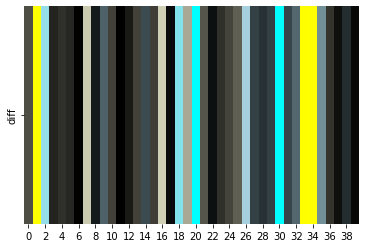

In [79]:
ax = sns.heatmap(
    data=ft.drop(columns=['index']).T,
    vmin=-1.0,
    vmax=1.0,
    cbar=False,
    cmap=custom_color_map
)

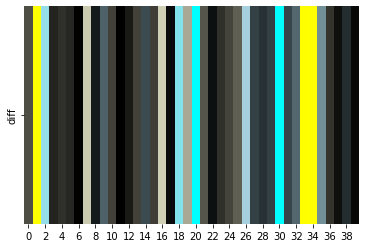

In [80]:
ax = sns.heatmap(
    data=realft.drop(columns=['index']).T,
    vmin=-1.0,
    vmax=1.0,
    cbar=False,
    cmap=custom_color_map
)